# Urban Air Pollution Challenge : Group 28

In [1]:
# Import needed librairies
libraries <- c("data.table","rpart","randomForest", "e1071", "ggplot2", "dummy","corrplot","caret")

In [2]:
for (lib in libraries) {
  if (!require(lib, character.only = TRUE)) {
    install.packages(lib)
    library(lib, character.only = TRUE)
  }
}


Loading required package: data.table

Loading required package: rpart

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Loading required package: e1071

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: dummy

dummy 0.1.3

dummyNews()

Loading required package: corrplot

corrplot 0.92 loaded

Loading required package: caret

Loading required package: lattice



In [3]:
# Set seed for reproducibility
set.seed(3)

In [4]:
# Load data
training_data <- read.csv("Train.csv",  stringsAsFactors=T,)
testing_data <- read.csv("Test.csv",  stringsAsFactors=T)
submission <- read.csv("SampleSubmission.csv")

# 1.1 Data Overview and preprocessing

In [5]:
# Overview of datasets dimensions
dim(training_data)
dim(testing_data)

[1] 30557    82

[1] 16136    77

The training dataset contains 30557 rows (samples) and 82 variables (81 features and 1 target variable). The testing dataset not contains rouglhy 2 times less samples (16136 rows) and has less variables (does not contains the target variable and certains features).

In [6]:
head(training_data)

,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.000000,60.2,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.600000,48.8,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,010Q650 X 2020-01-04,2020-01-04,010Q650,24,8,56,1181.96,96,16.400000,33.4,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,010Q650 X 2020-01-05,2020-01-05,010Q650,49,10,55,1113.67,96,6.911948,21.3,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,010Q650 X 2020-01-06,2020-01-06,010Q650,21,9,52,1164.82,95,13.900001,44.7,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,010Q650 X 2020-01-07,2020-01-07,010Q650,28,10,52,1053.22,94,14.600000,42.2,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


In [7]:
head(testing_data)

,Place_ID.X.Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,0OS9LVX X 2020-01-07,2020-01-07,0OS9LVX,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


In [8]:
summary(training_data)

             Place_ID.X.Date          Date          Place_ID    
 010Q650 X 2020-01-02:    1   2020-02-04:  334   010Q650:   94  
 010Q650 X 2020-01-03:    1   2020-02-06:  333   0DPWHX8:   94  
 010Q650 X 2020-01-04:    1   2020-02-03:  332   0GBXTHY:   94  
 010Q650 X 2020-01-05:    1   2020-02-05:  332   0HYPV1N:   94  
 010Q650 X 2020-01-06:    1   2020-02-07:  332   0KV6RJ1:   94  
 010Q650 X 2020-01-07:    1   2020-01-05:  331   0MGEY68:   94  
 (Other)             :30551   (Other)   :28563   (Other):29993  
     target         target_min       target_max  target_variance  
 Min.   :  1.00   Min.   :  1.00   Min.   :  1   Min.   :      0  
 1st Qu.: 25.00   1st Qu.:  5.00   1st Qu.: 60   1st Qu.:   1065  
 Median : 50.00   Median : 15.00   Median : 91   Median :   2395  
 Mean   : 61.15   Mean   : 29.03   Mean   :118   Mean   :   7984  
 3rd Qu.: 80.00   3rd Qu.: 44.00   3rd Qu.:155   3rd Qu.:   5883  
 Max.   :815.00   Max.   :438.00   Max.   :999   Max.   :1841490  
           

# 1.1.1 Preprocessing  categorical variables

The variables are of different types : categorical (factors), floatting (fct) or integer (int).

The type of input variables are the following

In [9]:
sapply(training_data[1,],class)

Place_ID.X.Date 
                                           "factor" 
                                               Date 
                                           "factor" 
                                           Place_ID 
                                           "factor" 
                                             target 
                                          "numeric" 
                                         target_min 
                                          "numeric" 
                                         target_max 
                                          "numeric" 
                                    target_variance 
                                          "numeric" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                          "numeric" 
                  relative_humidity_2m_above_ground 
                                          "numeric" 
                  specific_humidity_2m_above_ground 
                                          "numeric" 
                        temperature_2m_above_ground 
                                          "numeric" 
               u_component_of_wind_10m_above_ground 
                                          "numeric" 
               v_component_of_wind_10m_above_ground 
                                          "numeric" 
                   L3_NO2_NO2_column_number_density 
                                          "numeric" 
             L3_NO2_NO2_slant_column_number_density 
                                          "numeric" 
                     L3_NO2_absorbing_aerosol_index 
                                          "numeric" 
                              L3_NO2_cloud_fraction 
                                          "numeric" 
                             L3_NO2_sensor_altitude 
                                          "numeric" 
                        L3_NO2_sensor_azimuth_angle 
                                          "numeric" 
                         L3_NO2_sensor_zenith_angle 
                                          "numeric" 
                         L3_NO2_solar_azimuth_angle 
                                          "numeric" 
                          L3_NO2_solar_zenith_angle 
                                          "numeric" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                          "numeric" 
                         L3_NO2_tropopause_pressure 
                                          "numeric" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                          "numeric" 
                     L3_O3_O3_column_number_density 
                                          "numeric" 
                     L3_O3_O3_effective_temperature 
                                          "numeric" 
                               L3_O3_cloud_fraction 
                                          "numeric" 
                         L3_O3_sensor_azimuth_angle 
                                          "numeric" 
                          L3_O3_sensor_zenith_angle 
                                          "numeric" 
                          L3_O3_solar_azimuth_angle 
                                          "numeric" 
                           L3_O3_solar_zenith_angle 
                                          "numeric" 
                     L3_CO_CO_column_number_density 
                                          "numeric" 
                    L3_CO_H2O_column_number_density 
                                          "numeric" 
                                 L3_CO_cloud_height 
                                          "numeric" 
                              L3_CO_sensor_altitude 
                                          "numeric" 
                         L3_CO_sensor_azimuth_angle 
                                          "numeric" 
        

As there are categorical variables, we need to transform them in 'one-hot-encoding' in order to allow them to be processed by a learning algorithm. For each value of the categorical variable, we create a binary feature, which is set to one whenever that value is present.

In [10]:
# Get indices of factor variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")
factor_variables

Place_ID.X.Date            Date        Place_ID 
              1               2               3

In [11]:
data_factor<-training_data[,factor_variables]
dim(data_factor)

[1] 30557     3

# Remove redundant variable

In [12]:
# Overview of their content
data_factor[1:2,]
# Update the variable factor_variables
factor_variables<-which(sapply(training_data[1,],class)=="factor")

,Place_ID.X.Date,Date,Place_ID
,<fct>,<fct>,<fct>
1,010Q650 X 2020-01-02,2020-01-02,010Q650
2,010Q650 X 2020-01-03,2020-01-03,010Q650


As PLACE_ID.X.Date is a combination of Date and Place_ID and therefore provides no additional information, we remove it.

In [13]:
training_data<- subset(training_data, select = -Place_ID.X.Date)
training_data[1:2,]

,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,010Q650,38,23,53,769.50,92,11.0,60.2,0.00804,⋯,38.59302,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,2020-01-03,010Q650,39,25,63,1319.85,91,14.6,48.8,0.00839,⋯,59.62491,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365


In [14]:
testing_data<- subset(testing_data, select = -Place_ID.X.Date)
testing_data[1:2,]

,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-01-02,0OS9LVX,11.6,30.2,0.00409,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,2020-01-03,0OS9LVX,18.3,42.9,0.00595,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA


# Conversion into "one-hot-encoding"

In [15]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = training_data)
one_hot_encoded.training <- predict(dummy_vars, newdata = training_data)
dim(one_hot_encoded.training)

[1] 30557   434

Overview of the one hot encoded variables

In [16]:
one_hot_encoded.training[1:2,]

,Date.2020-01-02,Date.2020-01-03,Date.2020-01-04,Date.2020-01-05,Date.2020-01-06,Date.2020-01-07,Date.2020-01-08,Date.2020-01-09,Date.2020-01-10,Date.2020-01-11,⋯,Place_ID.YAQHNNY,Place_ID.YAXBMZ6,Place_ID.YCXA4V5,Place_ID.YDW4K0H,Place_ID.YJENTFL,Place_ID.YLLOKEY,Place_ID.YLZOBFW,Place_ID.YPXSK14,Place_ID.YSIXKFZ,Place_ID.YWSFY6Q
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Therefore, we add these one-hot encoded variables and delete the two factors variables

In [17]:
training_data <- subset(training_data, select = -Date)
training_data <- subset(training_data, select = -Place_ID)
head(training_data)

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,23,53,769.50,92,11.000000,60.2,0.00804000,18.51684,1.996377,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,39,25,63,1319.85,91,14.600000,48.8,0.00839000,22.54653,3.330430,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,24,8,56,1181.96,96,16.400000,33.4,0.00750000,27.03103,5.065727,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,49,10,55,1113.67,96,6.911948,21.3,0.00391000,23.97186,3.004001,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,21,9,52,1164.82,95,13.900001,44.7,0.00535000,16.81631,2.621787,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,28,10,52,1053.22,94,14.600000,42.2,0.00586156,19.17489,2.955603,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


We do the same procedure for the test dataset

In [18]:
dummy_vars <- dummyVars(~ Date + Place_ID, data = testing_data)
one_hot_encoded.testing <- predict(dummy_vars, newdata = testing_data)
testing_data <- subset(testing_data, select = -Date)
testing_data <- subset(testing_data, select = -Place_ID)
head(testing_data)

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,-0.2684903,0.08879496,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,0.4607204,0.04119687,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,0.8438090,0.02319110,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


# Replace NA values with mean values

Before adding the one-hot variables into the training data, we remove the NA values with mean values. The rationale behind this choice is that the mean values does not change the data distribution and is computationally efficient.

In [19]:
sum(is.na(training_data))

[1] 388262

In [20]:
sum(is.na(testing_data))

[1] 215137

In [21]:
# Function that replace NA values with mean values
replace_na_with_mean_value<-function(vec) {
    mean_vec<-mean(vec,na.rm=T)
    vec[is.na(vec)]<-mean_vec
    vec
}


In [22]:
# We apply the function on each column of the training data
training_data<-data.frame(apply(training_data,2,replace_na_with_mean_value))
# Equivalently for the testing data
testing_data <- data.frame(apply(testing_data,2,replace_na_with_mean_value))

After replacing the missing values, by the mean value of the feature

In [23]:
sum(is.na(training_data))

[1] 0

Equivalently for the testing data

In [24]:
sum(is.na(testing_data))

[1] 0

As we can see the number of NA values is 0. Therefore, there are no missing values in training data.

# Add one-hot encoding variables to the training data

After removing missing values, we add the one-hot encoded variables.

In [25]:
training_data<-cbind(training_data,one_hot_encoded.training)
testing_data<-cbind(testing_data,one_hot_encoded.testing)
dim(training_data)
dim(testing_data)

[1] 30557   513

[1] 16136   347

We see that the number of features increases strongly by using one-hot encodage


We split the dataset into two categories : a training set and a validation set. The training data is used to train the models, while the validation data is for validating their performances. The reason of doing that is to prevent overfitting and it allows to generalize performance on unseen data.

In [26]:
smp_size  <- floor(0.75 * nrow(training_data))
train_idx <- sample(seq_len(nrow(training_data)), size = smp_size)
training_data <- training_data[train_idx,]
eval_data  <- training_data[-train_idx,]
dim(training_data)
dim(eval_data)

[1] 22917   513

[1] 5706  513

In [27]:
X<-training_data[,setdiff(colnames(training_data),"target")]
Y<-training_data[,"target"]
X_valid<-eval_data[,setdiff(colnames(training_data),c("target"))]
Y_valid <- eval_data[,"target"]
# Rename new variables introduced
colnames(X) <- gsub(colnames(X),pattern = " ", replacement = "_")
colnames(X) <- gsub(colnames(X),pattern = "-", replacement = "_")
N<-nrow(X)    #Number of examples
n<-ncol(X)    #Number of input variables
CV_folds    <- 10
size_CV  <- floor(N/CV_folds)
N
n

[1] 22917

[1] 512

We can see by the number of columns (variables) that the target variable has been removed in the dataframe X.

In [28]:
summary(X)

   target_min       target_max    target_variance    target_count   
 Min.   :  1.00   Min.   :  1.0   Min.   :      0   Min.   :   2.0  
 1st Qu.:  5.00   1st Qu.: 60.0   1st Qu.:   1069   1st Qu.:  44.0  
 Median : 15.80   Median : 91.0   Median :   2415   Median :  72.0  
 Mean   : 29.05   Mean   :118.4   Mean   :   8019   Mean   : 125.6  
 3rd Qu.: 43.00   3rd Qu.:155.0   3rd Qu.:   5891   3rd Qu.: 150.0  
 Max.   :438.00   Max.   :999.0   Max.   :1549440   Max.   :1552.0  
 precipitable_water_entire_atmosphere relative_humidity_2m_above_ground
 Min.   : 0.420                       Min.   :  6.80                   
 1st Qu.: 7.612                       1st Qu.: 58.70                   
 Median :12.200                       Median : 74.10                   
 Mean   :15.287                       Mean   : 70.51                   
 3rd Qu.:19.900                       3rd Qu.: 85.40                   
 Max.   :72.600                       Max.   :100.00                   
 specific_hum

# Normalization

As the features have different scales, normalization is neededed to scale numerical features to a standard range. That ensures that they contribute equally to the analysis. The kind of normalization that we use is the Min-Max normalization which scales the data between a certain range of values.
For each value X, we compute the normalized value as follow
$$
X_{normalized} = \frac{X-X_{min}}{X_{max} - X_{min}}
$$


Although a model *might* converge without feature normalization, normalization makes training much more stable. Note: There is no advantage to normalizing the one-hot features, it is done here for simplicity.


To illustrate, we analyze the range of two selected variables

In [29]:
# Min-Max normalization function
min_max_normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

In [30]:
testing_data <- as.data.frame(lapply(testing_data, min_max_normalize)) # Apply the normalization function to all the testing data
testing_data[1:3,]

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,Place_ID.Y52UFLS,Place_ID.YBSLUIZ,Place_ID.YJDNZNX,Place_ID.YJNLXFF,Place_ID.YTSD0FF,Place_ID.YY9I2R1,Place_ID.YYOM5TU,Place_ID.Z2XYMS4,Place_ID.ZIESWTR,Place_ID.ZZDJZMS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1720257,0.2518757,0.1915092,0.6715321,0.5540361,0.4802414,0.06657877,0.08053446,0.4557604,0.01075178,⋯,0,0,0,0,0,0,0,0,0,0
2,0.2797428,0.3879957,0.2849706,0.6775458,0.5617069,0.4785910,0.06425755,0.08121112,0.3775500,0.02830689,⋯,0,0,0,0,0,0,0,0,0,0
3,0.2684887,0.3708467,0.2824582,0.6854264,0.5901251,0.5104419,0.06418336,0.10009143,0.3728802,0.01037382,⋯,0,0,0,0,0,0,0,0,0,0


In [31]:
X <- as.data.frame(lapply(X, min_max_normalize)) # Apply the normalization function to all the training data
X_valid <- as.data.frame(lapply(X_valid, min_max_normalize)) # Apply the normalization function to all the training data
X[1:3,]


,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,⋯,Place_ID.YAQHNNY,Place_ID.YAXBMZ6,Place_ID.YCXA4V5,Place_ID.YDW4K0H,Place_ID.YJENTFL,Place_ID.YLLOKEY,Place_ID.YLZOBFW,Place_ID.YPXSK14,Place_ID.YSIXKFZ,Place_ID.YWSFY6Q
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.009153318,0.07114228,0.002299844,0.02709677,0.11609811,0.7381974,0.14827894,0.4922166,0.4831845,0.6755366,⋯,0,0,0,0,0,0,0,0,0,0
2,0.009153318,0.07314629,0.002853792,0.01354839,0.10723138,0.6332618,0.20199869,0.5990961,0.4611743,0.3667237,⋯,0,0,0,0,0,0,0,0,0,0
3,0.242562929,0.25250501,0.011579216,0.01419355,0.05652478,0.7092275,0.07075447,0.3546124,0.4547582,0.5887115,⋯,0,0,0,0,0,0,0,0,0,0


As we can see all the variables are in the range [0, 1]. At this stage, the training data is normalized, the categorical variables were converted into one-hot encoding and the missing values were replaced by the mean values.

# Data distribution

In this part, we focus on the data distribution. In a first time, we focus on the distribution of the target variable.

#  PM2.5 particulate matter concentration distribution

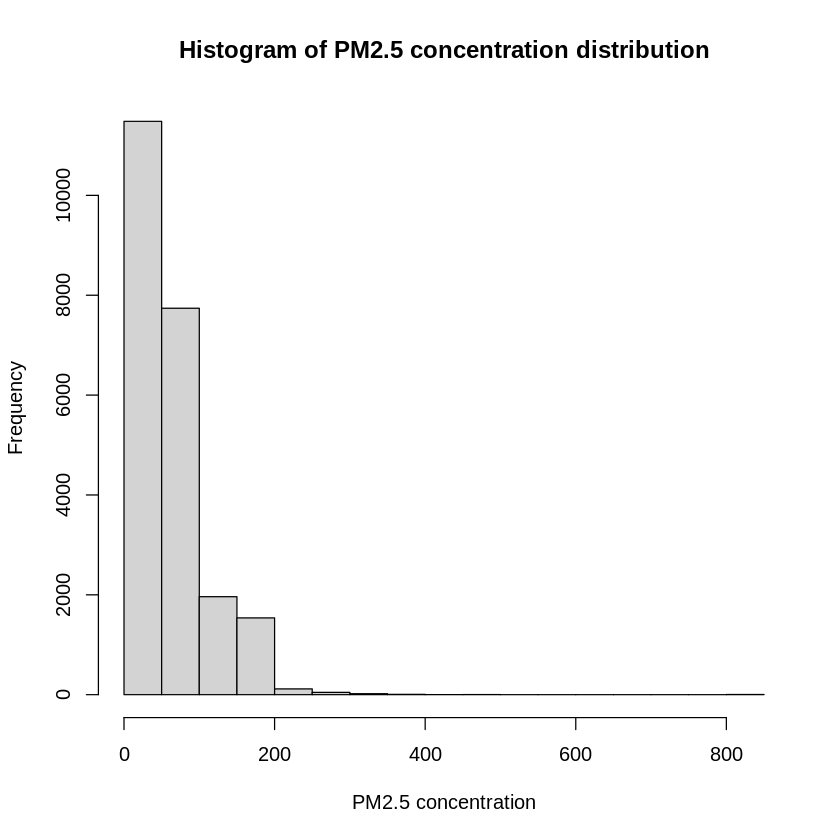

In [32]:
# Histogram of the target variable
hist(Y,
     main = "Histogram of PM2.5 concentration distribution",
     xlab = "PM2.5 concentration",
     ylab = "Frequency")



In [33]:
mean(Y)

[1] 61.24509

In [34]:
var(Y)

[1] 2215.251

In [35]:
# Compute the frequency table for the target variable
frequency_table <- table(Y)
prop_table <- prop.table(frequency_table)
percentage_table <- prop_table * 100
# Overview of the percentage table
percentage_table

Y
          1           2           3           4           5           6 
0.148361478 0.100362177 0.052362875 0.047999302 0.305450103 0.104725749 
          7           8           9         9.4         9.5          10 
0.187633634 0.327267967 0.990531047 0.004363573 0.004363573 0.506174456 
         11        11.5        11.6        11.9          12        12.1 
0.423266571 0.008727146 0.004363573 0.004363573 0.493083737 0.013090719 
       12.3        12.4        12.5        12.6        12.7        12.8 
0.004363573 0.008727146 0.008727146 0.004363573 0.013090719 0.004363573 
       12.9          13        13.1        13.2        13.6        13.7 
0.004363573 2.452327966 0.004363573 0.008727146 0.004363573 0.008727146 
       13.8          14        14.1        14.2        14.5        14.7 
0.008727146 0.698171663 0.017454292 0.004363573 0.008727146 0.004363573 
       14.8        14.9          15        15.1        15.2        15.4 
0.004363573 0.013090719 0.973076755 0.013090719 0

Additionally, the density plot of the target variable

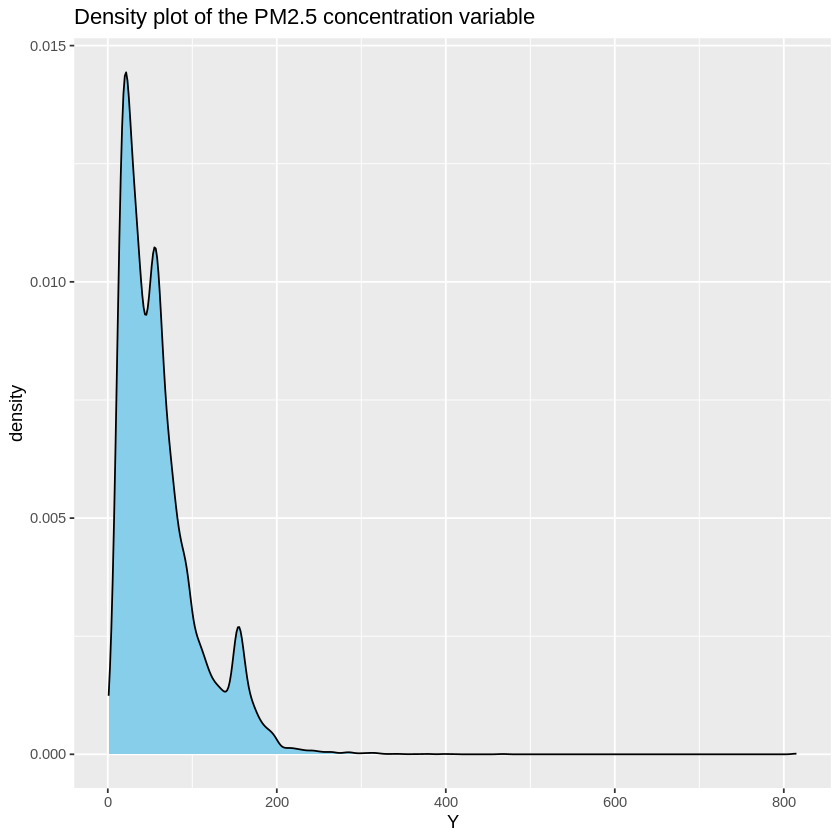

In [36]:
ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")

From these plots, we can see that the dataset is umbalanced since the distribution is left-skewed. There is a clear peak towards the value 25 for the target variable (since the percentage table indicates the highest frequency value for this value). The distribution of the target variable seems to be consistent since the higher the PM.2 matter concentration is, the lower the frequency is (indicating that higher level of pollution are less frequent).

We also plot the boxplot to visualise potential outliers.

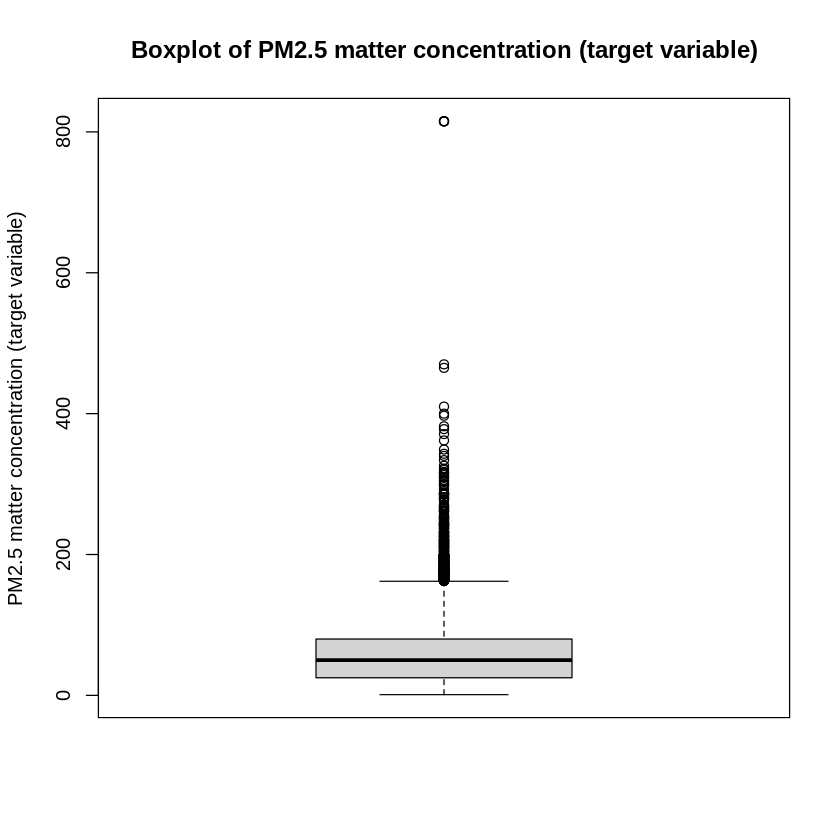

In [37]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

This boxplot is indicating a strong positive skew and showing a lot of outliers.

# Log Transformation

Applying a log transforation to the target variable which is skewed can help to reduce the skewness and therefore make the distribution more symmetric. Logarithmic transformations compress the range of extreme values and thus reduces the impact of outliers.

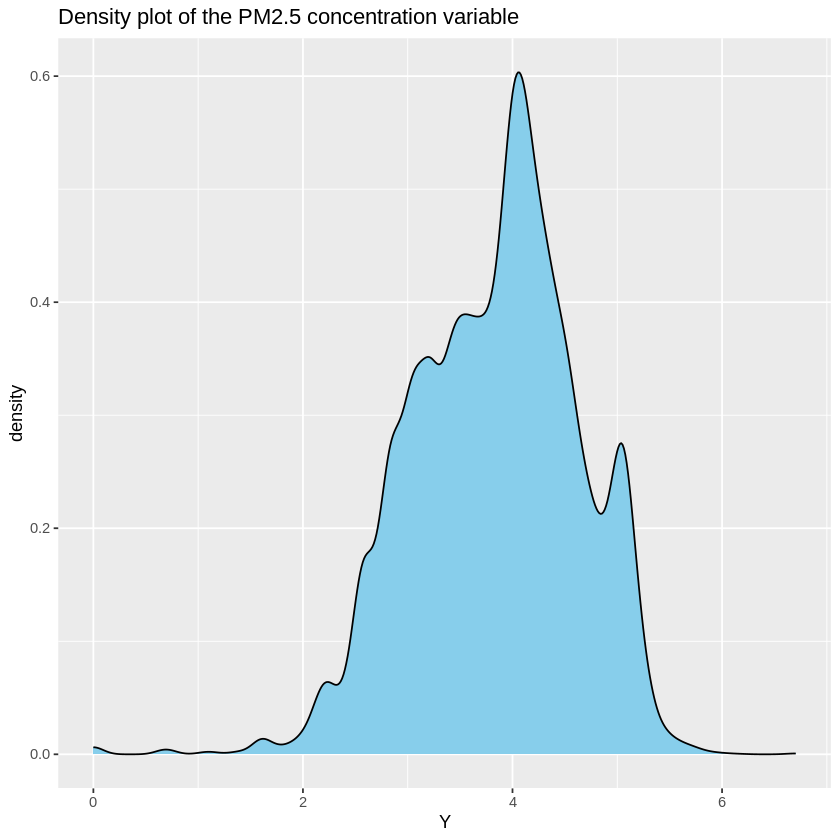

In [38]:
Y <- log(Y) # Log transformation on te training target set
Y_valid <- log(Y_valid) # We do it also for the validation set

ggplot(training_data, aes(x = Y)) +
  geom_density(fill = "skyblue", color = "black") +
  labs(title = "Density plot of the PM2.5 concentration variable")



In [39]:
mean(Y)
var(Y)

[1] 3.836064

[1] 0.6117622

We can see that the log transformation has effectively reduced the skewness of the distribution, leading to a more symmetric one.

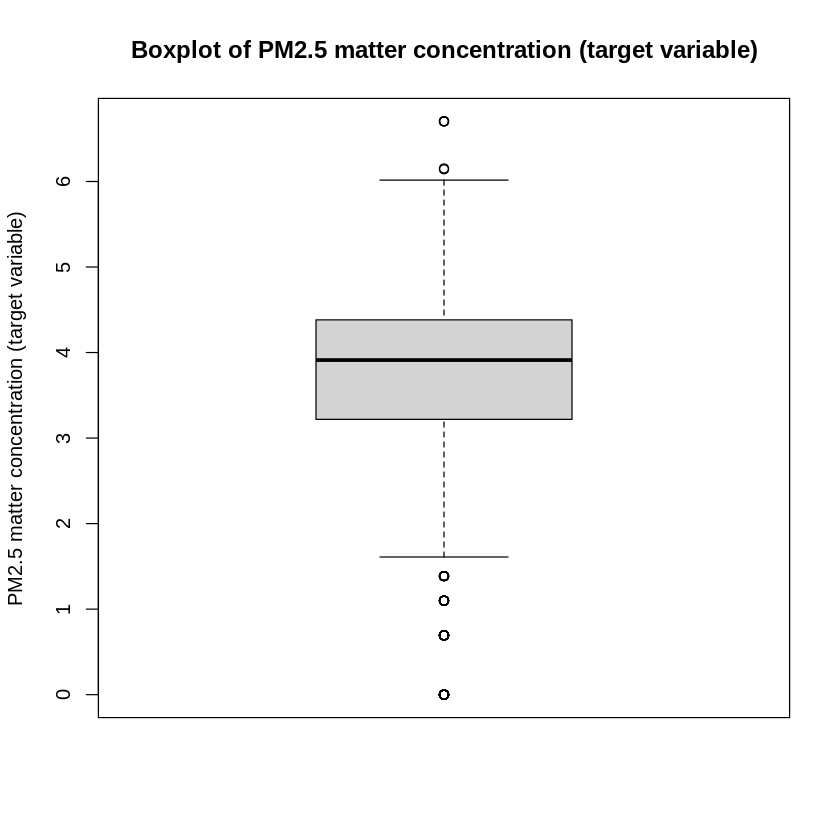

In [40]:
boxplot(Y,
        main = "Boxplot of PM2.5 matter concentration (target variable)",
        ylab = "PM2.5 matter concentration (target variable)")

The boxplot shows less outliers and a symmetric distribution (as demonstrated by the density plot)

# Linear model

Before doing the feature selection process, we create a linear model for predicting the PM2.5 concentration matter on the basis of the feature and compute the root mean squared error as performance metric, defined as follow :

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

The second performance metric is the normalised mean squared error which is defined as follow :
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.



The purpose of doing this is to have a first feeling on the potential features that significantly are correlated with the output

In [41]:
DS<-cbind(X,target=Y) # Create a new dataset containing the features and the target column
model<- lm(target~.,DS)
Y_hat<- predict(model,X)
# Inverse-transform the predictions
Y_hat <- exp(Y_hat)
rmse<-sqrt(mean((exp(Y)-Y_hat)^2))
print(paste("RMSE =",round(rmse,digits=4)))

[1] "RMSE = 43.2628"


To have a first overview of which input variables are correlated with the output

In [42]:
summary(model)


Call:
lm(formula = target ~ ., data = DS)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4272 -0.1788  0.0116  0.1958  2.4005 

Coefficients: (2 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                          7.611e+00  7.507e-01
target_min                                           4.326e+00  5.114e-02
target_max                                           1.084e+00  3.871e-02
target_variance                                     -1.733e-01  9.785e-02
target_count                                         1.982e+00  1.199e-01
precipitable_water_entire_atmosphere                -4.597e-01  4.493e-02
relative_humidity_2m_above_ground                   -2.166e-02  2.940e-02
specific_humidity_2m_above_ground                    1.431e-01  7.251e-02
temperature_2m_above_ground                         -1.491e-02  8.226e-02
u_component_of_wind_10m_above_ground                -6.173e-01  3.2

All the variables with stars (either *,** or ***)  impact significantly the target variable (PM2.5 concentration matter). The number of stars indicates the significance level chosen (either 0.05, 0.01 or 0.001). For example, the variable "L3_NO2_NO2_column_number_density" impacts significantly the PM2.5 concentration matter with a significance level of 0.001. With this overview, we can have a feeling about which variables are necessary for the prediction of the target variable.                   

# Relationship between features and the ouput

# Correlation

One way to analyze the relationship between the features and the output is to compute the correlation between the features and the target variable.
Features having strong correlation factor with the target variable means that there is a significant relationship or association between that particular feature and the target variable.

We compute the correlation factors between the features and the target variable and order them in deacreasing order

In [43]:
correlation_vector <-abs(cor(X,Y))
# Rank variables according to correlation with the output variable
correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
selected_column_names <- colnames(X)[correlation_ranking_idx]
# Overview of the 10 most correlated feature with output variable
selected_column_names[1:10]

[1] "target_min"                                     
 [2] "target_max"                                     
 [3] "L3_AER_AI_sensor_altitude"                      
 [4] "L3_HCHO_tropospheric_HCHO_column_number_density"
 [5] "L3_CO_CO_column_number_density"                 
 [6] "L3_HCHO_HCHO_slant_column_number_density"       
 [7] "L3_NO2_NO2_column_number_density"               
 [8] "L3_NO2_NO2_slant_column_number_density"         
 [9] "L3_NO2_tropospheric_NO2_column_number_density"  
[10] "Place_ID.J3C3IAI"

In the next, we will use this correlation factor to do feature selection, using therefore a filter method.

# Relationship between features

Features having strong correlation provide redundant information which introduce unnecessary complexity. Therefore, eliminating such features can streamline model training, reduce overfitting, and enhance efficiency. To analyse the correlation between features, we use a correlaton plot that indicates the correlation factor for each pairs of features. As the number of variables is high (more than 500), we cannot plot the correlation plot of all the variables. Therefore, we plot only the correlation plot of the 50 most features having the highest correlation with the output variable

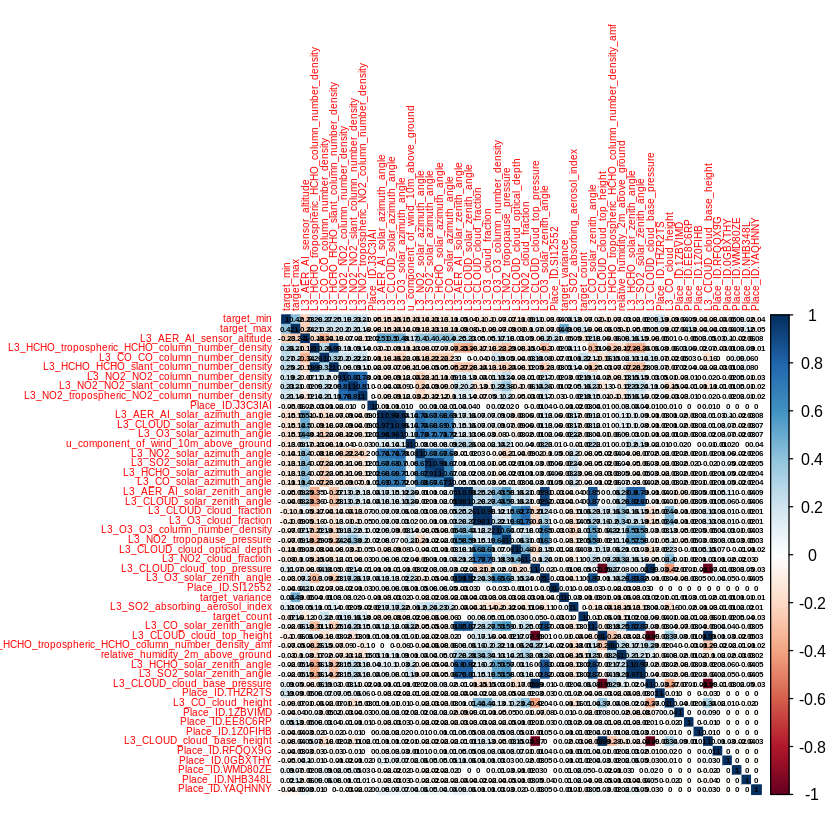

In [44]:
selected_features <- X[,correlation_ranking_idx]
plot_features <- X[,correlation_ranking_idx[1:50]]
correlations <- cor(plot_features)
corrplot(correlations, method = "color", addCoef.col = "black", number.cex = 0.4, tl.cex = 0.5,number.digits = 2)

As this plot shows, there are a lot of features that are strongly correlated. To avoid overfitting and unnecessary complexity, we need to remove the features that provide no additional information. This shows the necessary of applying a feature selection technique.



In [44]:
n_features <- ncol(correlations)

target_correlations <- cor(X, Y) # Correlation of features according to target
target_correlations <- target_correlations[correlation_ranking_idx]

# List to keep track of features to delete
to_delete <- c()


for (i in 1:(n_features-1)) {
  for (j in (i+1):n_features) {
    if (correlations[i, j] > 0.9) {
      if (abs(target_correlations[i]) < abs(target_correlations[j])) {
        to_delete <- c(to_delete, i)
      } else {
        to_delete <- c(to_delete, j)
      }
    }
  }
}

# Remove duplicates
to_delete <- unique(to_delete)

# Remove the highly correlated features
plot_features <- plot_features[, -to_delete]
X <- plot_features
# Print the remaining features
dim(plot_features)
head(plot_features)
N<-nrow(plot_features)    #Number of examples
n<-ncol(plot_features)    #Number of input variables

[1] 22917    41

,target_min,target_max,L3_AER_AI_sensor_altitude,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,Place_ID.J3C3IAI,⋯,Place_ID.THZR2TS,L3_CO_cloud_height,Place_ID.1ZBVIMD,Place_ID.EE8C6RP,Place_ID.1Z0FIHB,Place_ID.RFQQX9G,Place_ID.0GBXTHY,Place_ID.WMD80ZE,Place_ID.NHB348L,Place_ID.YAQHNNY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.009153318,0.07114228,0.2378687,0.3629743,0.1823196,0.4978985,0.02989502,0.04872983,0.02810006,0,⋯,0,0.12626063,0,0,0,0,0,0,0,0
2,0.009153318,0.07314629,0.2891840,0.4094485,0.2330180,0.5447466,0.04406199,0.06947136,0.04864301,0,⋯,0,0.21579160,0,0,0,0,0,0,0,0
3,0.242562929,0.25250501,0.1796989,0.5127779,0.1923997,0.6827551,0.05109815,0.12726508,0.06217543,0,⋯,0,0.50094959,0,0,0,0,0,0,0,0
4,0.029748284,0.08316633,0.2877520,0.3870531,0.2978198,0.5298319,0.03464069,0.06618214,0.02992757,0,⋯,0,0.09490832,0,0,0,0,0,0,0,0
5,0.128146453,0.17034068,0.1899799,0.4097730,0.2437676,0.5429937,0.03798482,0.05399544,0.04955136,0,⋯,0,0.35121228,0,0,0,0,0,0,0,0
6,0.144164760,0.16533066,0.2233577,0.3494329,0.1653323,0.4571700,0.02956199,0.04992642,0.02720456,0,⋯,0,0.12638699,0,0,0,0,0,0,0,0


# Feature selection

# 1. Correlation  with the output

The objective of this filter method is to keep the most correlated variables with the target variable. To have a better overview of the generalization to useen data of the model, we will use a cross validation with 10 folds (for computational purpose).

In [45]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)
for (i in 1:CV_folds) {
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]


    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix

  for (nb_features in 1:length(correlation_ranking_idx)) {


          # Create a dataset including only the nb_features most correlated variables with the output
          DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],target=Y_tr)

          # Model fit (using lm function)
          model<- lm(target~.,DS)

          # Model prediction
        Y_hat<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        Y_hat <- exp(Y_hat) # Transform the log-prediction into the real prediction (log-transformation)
        CV_err[nb_features,i] <-sqrt(mean((exp(Y_ts)-Y_hat)^2))
  }
}
print(paste("#Features: ",c(1:n)," ; RMSE error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


 [1] "#Features:  1  ; RMSE error= 155.4327  ; std dev= 328.3605"
 [2] "#Features:  2  ; RMSE error= 153.7785  ; std dev= 260.8221"
 [3] "#Features:  3  ; RMSE error= 117.3748  ; std dev= 179.1055"
 [4] "#Features:  4  ; RMSE error= 106.8252  ; std dev= 149.3459"
 [5] "#Features:  5  ; RMSE error= 103.4118  ; std dev= 138.0966"
 [6] "#Features:  6  ; RMSE error= 103.4251  ; std dev= 137.6766"
 [7] "#Features:  7  ; RMSE error= 99.9333  ; std dev= 119.2878" 
 [8] "#Features:  8  ; RMSE error= 101.2653  ; std dev= 120.5252"
 [9] "#Features:  9  ; RMSE error= 96.4654  ; std dev= 110.417"  
[10] "#Features:  10  ; RMSE error= 95.0476  ; std dev= 109.8762"
[11] "#Features:  11  ; RMSE error= 94.0458  ; std dev= 107.0427"
[12] "#Features:  12  ; RMSE error= 91.375  ; std dev= 102.6085" 
[13] "#Features:  13  ; RMSE error= 93.6965  ; std dev= 109.3356"
[14] "#Features:  14  ; RMSE error= 93.3937  ; std dev= 108.3931"
[15] "#Features:  15  ; RMSE error= 94.0065  ; std dev= 110.3309"
[16] "#Fea

As we can see, by adding the correlated variables (from the most correlated to the least correlated with the target variable), we can see that the performance metric, i.e here we analyses only the RMSE, decreases with the addition of features, indicating that these variables are relevant for predicting the target.

# 2.  mRMR

In [46]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]

    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)

    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n

    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))

        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }

        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score

        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)

        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }

    ranking <- selected

    for (nb_features in 1:length(ranking)) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        Y_hat_ts<- exp(Y_hat_ts)

        # Cross-validation error = MSE
        CV_err[nb_features,i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 155.4327  ; std dev= 328.3605"
 [2] "#Features:  2  ; CV error= 153.7785  ; std dev= 260.8221"
 [3] "#Features:  3  ; CV error= 117.3748  ; std dev= 179.1055"
 [4] "#Features:  4  ; CV error= 110.2746  ; std dev= 165.5366"
 [5] "#Features:  5  ; CV error= 100.8085  ; std dev= 138.831" 
 [6] "#Features:  6  ; CV error= 96.6946  ; std dev= 114.767"  
 [7] "#Features:  7  ; CV error= 94.7156  ; std dev= 109.5774" 
 [8] "#Features:  8  ; CV error= 91.9116  ; std dev= 104.7751" 
 [9] "#Features:  9  ; CV error= 88.5213  ; std dev= 96.3195"  
[10] "#Features:  10  ; CV error= 87.3302  ; std dev= 92.8777" 
[11] "#Features:  11  ; CV error= 87.1817  ; std dev= 93.7656" 
[12] "#Features:  12  ; CV error= 85.2959  ; std dev= 88.3809" 
[13] "#Features:  13  ; CV error= 84.5027  ; std dev= 86.7042" 
[14] "#Features:  14  ; CV error= 83.4488  ; std dev= 83.2452" 
[15] "#Features:  15  ; CV error= 82.7636  ; std dev= 82.2668" 
[16] "#Features:  16  ; CV error= 82.257

In [ ]:
correlation_ranking_idx

# 3. PCA

To analyze our features through another technique of feature selection, we use the Principal Component Analysis (PCA). The key idea of this dimensionality reduction technique is to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the data.  

In [47]:
# drop = F is used to preserve the structure of the data as data.frame (see https://www.r-bloggers.com/2018/02/r-tip-use-drop-false-with-data-frames/)
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X,retx=T)$x)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_pca[idx_ts,]
    Y_ts<-Y[idx_ts]

    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-Y[idx_tr]

    for (nb_components in 1:n) {
        # Create a dataset including only the first nb_components principal components
        DS<-cbind(X_tr[,1:nb_components,drop=F],target=Y_tr)

        # Model fit (using lm function)
        model<- lm(target~.,DS)

        # Model predictm
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        Y_hat_ts<- exp(Y_hat_ts)
        CV_err[nb_components,i]<-sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
    }
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))


 [1] "#Features:  1  ; CV error= 48.5443  ; std dev= 1.7252"   
 [2] "#Features:  2  ; CV error= 46.9563  ; std dev= 1.666"    
 [3] "#Features:  3  ; CV error= 46.9726  ; std dev= 1.6701"   
 [4] "#Features:  4  ; CV error= 46.594  ; std dev= 1.6847"    
 [5] "#Features:  5  ; CV error= 46.6011  ; std dev= 1.6829"   
 [6] "#Features:  6  ; CV error= 46.5848  ; std dev= 1.6815"   
 [7] "#Features:  7  ; CV error= 45.66  ; std dev= 1.6723"     
 [8] "#Features:  8  ; CV error= 43.194  ; std dev= 1.671"     
 [9] "#Features:  9  ; CV error= 43.1784  ; std dev= 1.6721"   
[10] "#Features:  10  ; CV error= 40.2704  ; std dev= 1.6532"  
[11] "#Features:  11  ; CV error= 59.2442  ; std dev= 8.2596"  
[12] "#Features:  12  ; CV error= 60.6392  ; std dev= 8.7038"  
[13] "#Features:  13  ; CV error= 65.6393  ; std dev= 9.7274"  
[14] "#Features:  14  ; CV error= 65.3549  ; std dev= 10.4829" 
[15] "#Features:  15  ; CV error= 67.5721  ; std dev= 11.2602" 
[16] "#Features:  16  ; CV error= 69.505

In [ ]:
After applying these 3 features selection process, we decided to keep the following features :

In [47]:
X_features_selected <- X[,1:40]
dim(X_features_selected)


X_valid<-X_valid[,1:40]
X_test<-testing_data[,1:40]

[1] 22917    40

# Model training

For this part, we selected 4 models to implement : linear models, decision tree, ensemble of decision trees, random forest, support vector machine and boosted-gradient trees . As validation method, we will systematically use a 10-cross validation error to have a better view of the generalization of the models to useen data. Note that as input variable, we use the selected features computed previously using feature selection done.

The two performance metrics used to assess the performance of the models are the following :

- The root mean squared error

$$ RMSE= \sqrt{ \frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}$$  

- The normalised mean squared error
$$ NMSE=  \frac{\sum_{i=1}^{N_{ts}} (y_{i} - \hat{y_{i}})^2}{\sum_{i=1}^{N_{ts}} (y_{i} - \bar{y})^2}$$
where
- $N_{ts}$ is the number of test observations,
- $\bar{y}$ = $\frac{1}{N_{ts}} \sum_{i=1}^{N_{ts}} y_i$
- $y_{i}$ is the measured concentration of the $i$th test observation,
- $\hat{y_{i}}$  is the predicted concentration of the $i$th  test observation.

# 1. Multiple linear regression model

The first model that we implement is a multiple linear regression model. This model is easy to interpret and simple which makes a good starting point for modeling tasks. It is also computational efficiency. Nevertheless, this model is limited as it makes the strong assumption that the relationship between the features and the target variable is linear.




In [ ]:
CV_folds<- 10
size_CV <-floor(N/CV_folds)
CV_rmse_lm<-numeric(CV_folds)
CV_nmse_lm<-numeric(CV_folds)
average_residuals_lm <- numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]
     DS<-cbind(X_tr,target=Y_tr)
     # Model fit (using lm function)
     model<- lm(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_lm <- average_residuals_lm + residuals

     # Cross validation error = Root Mean Squared Error
     CV_rmse_lm[i]<-sqrt(mean(residuals^2))
     CV_nmse_lm[i]<- sum(residuals^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}
average_residuals_lm <- average_residuals_lm / CV_folds


print(paste("CV root mean squared error=",round(mean(CV_rmse_lm),digits=4), " ; std dev=",round(sd(CV_rmse_lm),digits=4)))
print(paste("CV normalised mean squared error =",round(mean(CV_nmse_lm),digits=4), " ; std dev=",round(sd(CV_nmse_lm),digits=4)))


Warning message in average_residuals_lm + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV root mean squared error= 48.7513  ; std dev= 30.7519"
[1] "CV normalised mean squared error = 1.598  ; std dev= 1.9682"


# 2. Decision tree

In [ ]:
size_CV <-floor(N/CV_folds)
CV_rmse_single <-numeric(CV_folds)
CV_nmse_single <-numeric(CV_folds)
average_residuals_single <- numeric(CV_folds)
for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)

     # Model fit (using rpart function)
     model<- rpart(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)
     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_single <- average_residuals_single + residuals
     # Cross validation error = Mean Squared Error
     CV_rmse_single[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_single[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)

}
average_residuals_single <- average_residuals_single / CV_folds


print(paste("rmse = ",round(mean(CV_rmse_single),digits=4), " ; std dev=",round(sd(CV_rmse_single),digits=4)))
print(paste("nmse = ",round(mean(CV_nmse_single),digits=4), " ; std dev=",round(sd(CV_nmse_single),digits=4)))

Warning message in average_residuals_single + residuals:
“longer object length is not a multiple of shorter object length”


[1] "rmse =  25.8952  ; std dev= 14.3602"
[1] "nmse =  0.3548  ; std dev= 0.177"


In [ ]:
printcp(model)


Regression tree:
rpart(formula = target ~ ., data = DS)

Variables actually used in tree construction:
[1] target_max target_min

Root node error: 2691.3/4655 = 0.57815

n= 4655 

        CP nsplit rel error  xerror      xstd
1 0.488585      0   1.00000 1.00062 0.0219155
2 0.099282      1   0.51142 0.52951 0.0148909
3 0.083118      2   0.41213 0.42064 0.0121291
4 0.042217      3   0.32902 0.33469 0.0107635
5 0.024045      4   0.28680 0.30600 0.0104868
6 0.020085      5   0.26275 0.28027 0.0093831
7 0.013786      6   0.24267 0.25102 0.0090722
8 0.012174      7   0.22888 0.24757 0.0093884
9 0.010000      8   0.21671 0.22957 0.0080826


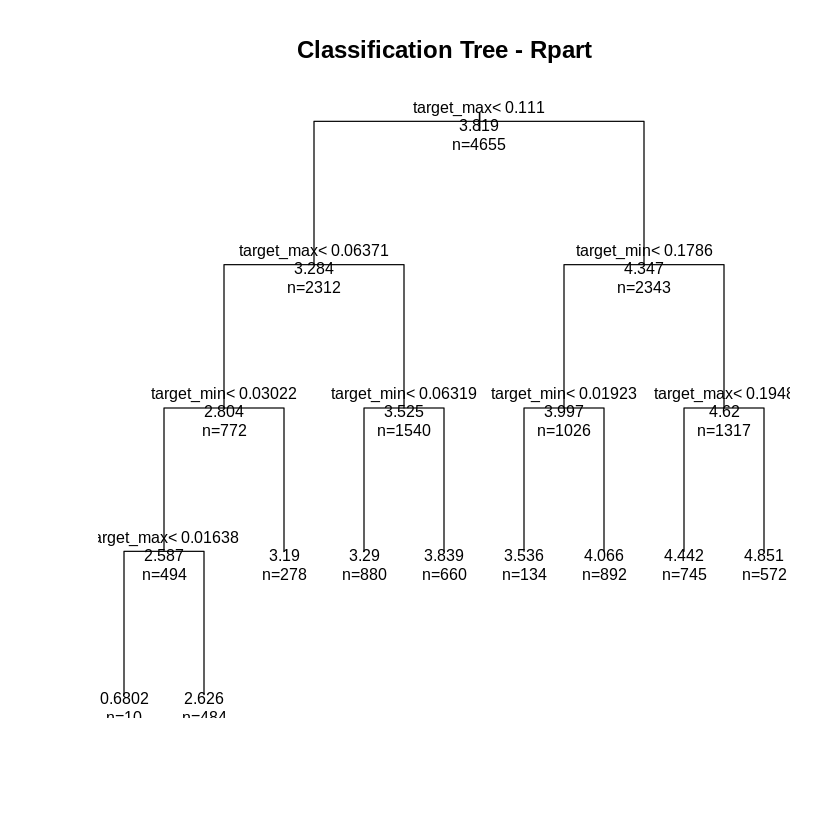

In [ ]:
plot(model, uniform=TRUE,
   main="Classification Tree - Rpart")
text(model, use.n=TRUE, all=TRUE, cex=.8)

Now, we create an ensemble of models composed R = 100 decisions trees

In [ ]:
R<-10
size_CV <-floor(N/CV_folds)
CV_rmse_ensemble<-numeric(CV_folds)
CV_nmse_ensemble<-numeric(CV_folds)
average_residuals_ensemble<- numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

    # The predictions of each individual model is stored as
    # a column of the Y_hat_ts_ensemble matrix
     Y_hat_ts_ensemble <- matrix(0,nrow=nrow(X_ts),ncol=R)

     for (r in 1:R) {
         idx_tr_resample <- sample(idx_tr,rep=T)
         X_tr<-X_features_selected[idx_tr_resample,]
         Y_tr<-Y[idx_tr_resample]

         DS<-cbind(X_tr,target=Y_tr)

         # Model fit (using rpart function)
         model<- rpart(target~.,DS)

         # Storing prediction for the r^th model
         Y_hat_ts_ensemble[,r]<- exp(predict(model,X_ts))


     }

     #Computing ensemble prediction (via model averaging)
     Y_hat_ts<-apply(Y_hat_ts_ensemble,1,mean)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts

     average_residuals_ensemble <- average_residuals_ensemble + residuals
     # Computation of CV RMSE
     CV_rmse_ensemble[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NRMSE
     CV_nmse_ensemble[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
     }

print(paste("CV rmse=",round(mean(CV_rmse_ensemble),digits=4), " ; std dev=",round(sd(CV_rmse_ensemble),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_ensemble),digits=4), " ; std dev=",round(sd(CV_nmse_ensemble),digits=4)))

average_residuals_ensemble <- average_residuals_ensemble / CV_folds

Warning message in average_residuals_ensemble + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV rmse= 24.0558  ; std dev= 15.0428"
[1] "CV nmse= 0.3071  ; std dev= 0.1933"


The CV rmse error is lower with 100 decisions trees than with a single tree-based model.

In [ ]:
mean(CV_rmse_rpart_ensemble_model) < mean(CV_rmse_rpart_single_model)

[1] TRUE

# 3. Random Forest

In [ ]:
CV_folds <- 10
R<-10
size_CV <-floor(N/CV_folds)
CV_rmse_rf<-numeric(CV_folds)
CV_nmse_rf<-numeric(CV_folds)
average_residuals_rf<- numeric(CV_folds)


for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

    # The predictions of each individual model is stored as
    # a column of the Y_hat_ts_rf matrix
     Y_hat_ts_rf <- matrix(0,nrow=nrow(X_ts),ncol=R)

     for (r in 1:R) {
         idx_tr_resample <- sample(idx_tr,rep=T)
         X_tr<-X_features_selected[idx_tr_resample,]
         Y_tr<-Y[idx_tr_resample]

         DS<-cbind(X_tr,target=Y_tr)


         model <- randomForest(target~., DS, ntree=r)
         # Storing prediction for the r^th model
         Y_hat_ts_rf[,r]<- exp(predict(model,X_ts))
     }

     #Computing ensemble prediction (via model averaging)
     Y_hat_ts<-apply(Y_hat_ts_rf,1,mean)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts

     average_residuals_rf <- average_residuals_rf + residuals

     # Computation of CV RMSE
     CV_rmse_rf[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     # Computation of CV NRMSE
     CV_nmse_rf[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
     }
average_residuals_rf <- average_residuals_rf / CV_folds

print(paste("CV rmse=",round(mean(CV_rmse_rf),digits=4), " ; std dev=",round(sd(CV_rmse_rf),digits=4)))
print(paste("CV nmse=",round(mean(CV_nmse_rf),digits=4), " ; std dev=",round(sd(CV_nmse_rf),digits=4)))

Warning message in average_residuals_rf + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV rmse= 20.9966  ; std dev= 16.0394"
[1] "CV nmse= 0.2341  ; std dev= 0.2118"


# 4. Support Vector Machines

In [ ]:
size_CV <-floor(N/CV_folds)

CV_rmse_svm<-numeric(CV_folds)
CV_nmse_svm<-numeric(CV_folds)
average_residuals_svm = numeric(CV_folds)

for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)

     # Model fit (using lm function)
     model<- svm(target~.,DS)

     # Model prediction
     Y_hat_ts<- predict(model,X_ts)
     Y_hat_ts<- exp(Y_hat_ts)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_svm <- average_residuals_svm + residuals

     # Cross validation error = Root Mean Squared Error
     CV_rmse_svm[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_svm[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
}


average_residuals_svm <- average_residuals_svm / CV_folds

print(paste("CV RMSE=",round(mean(CV_rmse_svm),digits=4), " ; std dev=",round(sd(CV_rmse_svm),digits=4)))
print(paste("CV NMSE=",round(mean(CV_nmse_svm),digits=4), " ; std dev=",round(sd(CV_nmse_svm),digits=4)))


Warning message in average_residuals_svm + residuals:
“longer object length is not a multiple of shorter object length”


[1] "CV RMSE= 24.6865  ; std dev= 16.8062"
[1] "CV NMSE= 0.3209  ; std dev= 0.2373"


# 5. Gradient-boosted trees

Adaptive boosting is a ensemble learning algorithm used for both classification and regression tasks. It works by combining multiple weak learners (models that perform slightly better than random chance) to create a strong classifier or regressor. The idea of combining multiple learners is to reduce the variance of the model. To implement this learning algorithm, we used the package "adabag" which is not listed in the section 5 of the project instructions.

In [ ]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
CV_folds <- 10
size_CV <-floor(N/CV_folds)
CV_rmse_xgboost<-numeric(CV_folds)
CV_nmse_xgboost<-numeric(CV_folds)
average_residuals_xgboost<-numeric(CV_folds)
for (i in 1:CV_folds) {
     idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
     X_ts<-X_features_selected[idx_ts,]
     Y_ts<-Y[idx_ts]

     idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
     X_tr<-X_features_selected[idx_tr,]
     Y_tr<-Y[idx_tr]

     DS<-cbind(X_tr,target=Y_tr)
     # Initialize the XGBoost regressor
     xgb <- xgboost(data = as.matrix(X_tr),
               label = Y_tr,
               max_depth = 3,
               eta = 0.1,
               nrounds = 100,
               objective = "reg:squarederror")

     # Model prediction
     Y_hat_ts<- predict(xgb, as.matrix(X_ts))
     Y_hat_ts<-exp(Y_hat_ts)

     # Residual calculation
     residuals <- exp(Y_ts) - Y_hat_ts
     average_residuals_xgboost <- average_residuals_xgboost + residuals

     # Cross validation error = RMSE
     CV_rmse_xgboost[i]<- sqrt(mean((exp(Y_ts)-Y_hat_ts)^2))
     CV_nmse_xgboost[i]<- sum((exp(Y_ts) - Y_hat_ts)^2) /  sum((exp(Y_ts) - mean(exp(Y_ts)))^2)
}
average_residuals_xgboost <- average_residuals_xgboost / CV_folds

print(paste("CV RMSE=",round(mean(CV_rmse_xgboost),digits=4), " ; std dev=",round(sd(CV_rmse_xgboost),digits=4)))
print(paste("CV NMSE=",round(mean(CV_nmse_xgboost),digits=4), " ; std dev=",round(sd(CV_nmse_xgboost),digits=4)))

[1]	train-rmse:3.114056 
[2]	train-rmse:2.806951 
[3]	train-rmse:2.530714 
[4]	train-rmse:2.282424 
[5]	train-rmse:2.059116 
[6]	train-rmse:1.858463 
[7]	train-rmse:1.678068 
[8]	train-rmse:1.516217 
[9]	train-rmse:1.370909 
[10]	train-rmse:1.240407 
[11]	train-rmse:1.123351 
[12]	train-rmse:1.018568 
[13]	train-rmse:0.924819 
[14]	train-rmse:0.840961 
[15]	train-rmse:0.766114 
[16]	train-rmse:0.699216 
[17]	train-rmse:0.640070 
[18]	train-rmse:0.587459 
[19]	train-rmse:0.540931 
[20]	train-rmse:0.499888 
[21]	train-rmse:0.463757 
[22]	train-rmse:0.432181 
[23]	train-rmse:0.404352 
[24]	train-rmse:0.380174 
[25]	train-rmse:0.359308 
[26]	train-rmse:0.341318 
[27]	train-rmse:0.325641 
[28]	train-rmse:0.312232 
[29]	train-rmse:0.300702 
[30]	train-rmse:0.290965 
[31]	train-rmse:0.282805 
[32]	train-rmse:0.275711 
[33]	train-rmse:0.269600 
[34]	train-rmse:0.264342 
[35]	train-rmse:0.259900 
[36]	train-rmse:0.256243 
[37]	train-rmse:0.253193 
[38]	train-rmse:0.250340 
[39]	train-rmse:0.247

Warning message in average_residuals_xgboost + residuals:
“longer object length is not a multiple of shorter object length”


[1]	train-rmse:3.062442 
[2]	train-rmse:2.761050 
[3]	train-rmse:2.490011 
[4]	train-rmse:2.246243 
[5]	train-rmse:2.027286 
[6]	train-rmse:1.830427 
[7]	train-rmse:1.653497 
[8]	train-rmse:1.494586 
[9]	train-rmse:1.351971 
[10]	train-rmse:1.224032 
[11]	train-rmse:1.109340 
[12]	train-rmse:1.006411 
[13]	train-rmse:0.914494 
[14]	train-rmse:0.832470 
[15]	train-rmse:0.759262 
[16]	train-rmse:0.693963 
[17]	train-rmse:0.636024 
[18]	train-rmse:0.584508 
[19]	train-rmse:0.539113 
[20]	train-rmse:0.498936 
[21]	train-rmse:0.463633 
[22]	train-rmse:0.432910 
[23]	train-rmse:0.405815 
[24]	train-rmse:0.382361 
[25]	train-rmse:0.361989 
[26]	train-rmse:0.344049 
[27]	train-rmse:0.329018 
[28]	train-rmse:0.315968 
[29]	train-rmse:0.304684 
[30]	train-rmse:0.294965 
[31]	train-rmse:0.286777 
[32]	train-rmse:0.279903 
[33]	train-rmse:0.274038 
[34]	train-rmse:0.268702 
[35]	train-rmse:0.264256 
[36]	train-rmse:0.260455 
[37]	train-rmse:0.257310 
[38]	train-rmse:0.254593 
[39]	train-rmse:0.252

# Hyperparameter tuning



# Comparison of the models performance

We first compare the performance of the models in terms of root mean squared error (RMSE).

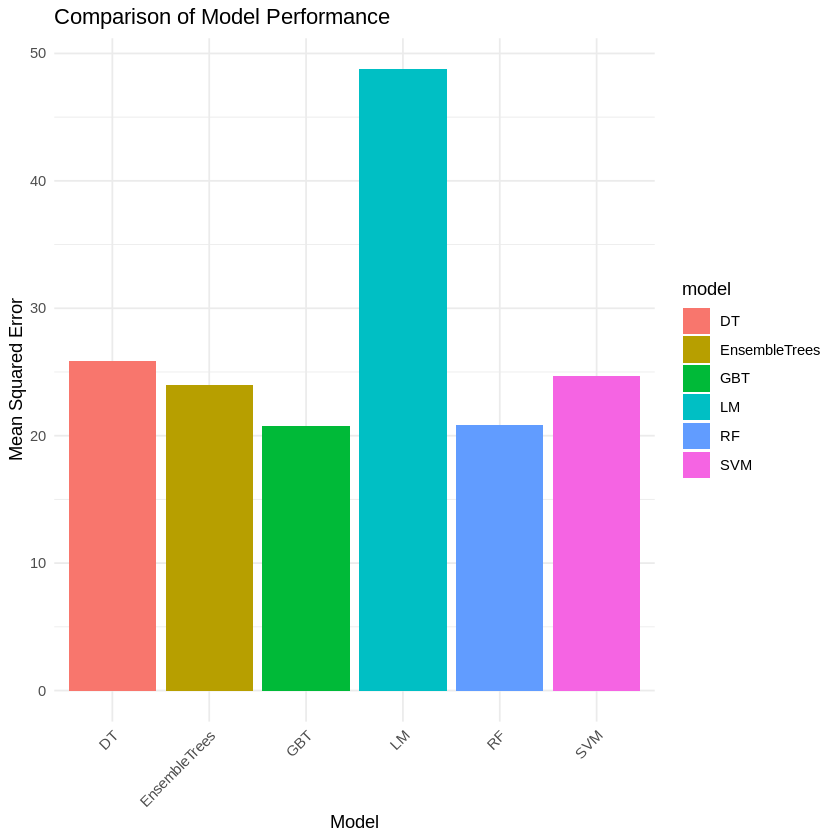

In [ ]:
# List of vectors containing root mean squared errors for different models
mse_list <- list(LM = mean(CV_rmse_lm) ,
                 DT = mean(CV_rmse_single),
                 EnsembleTrees = mean(CV_rmse_ensemble),
                 RF = mean(CV_rmse_rf),
                 SVM = mean(CV_rmse_svm),
                 GBT = mean(CV_rmse_xgboost)
                 )

# Create a data frame from the MSE list
mse_df <- data.frame(model = rep(names(mse_list), sapply(mse_list, length)),
                     mse = unlist(mse_list))

# Plotting
library(ggplot2)

# Plot mean squared errors
ggplot(mse_df, aes(x = model, y = mse, fill = model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of models performance",
       x = "Model",
       y = "Root Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


We also compare the performance of the models in term of normalised mean squared error (NMSE).

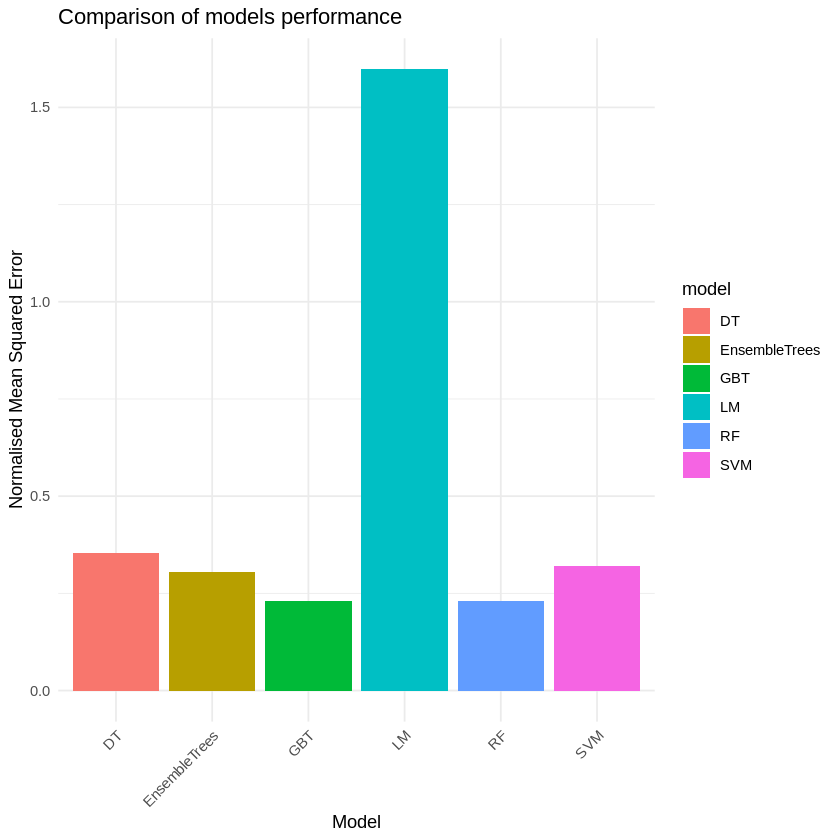

In [ ]:
# List of vectors containing normalized mean squared errors for different models
mse_list <- list(LM = mean(CV_nmse_lm) ,
                 DT = mean(CV_nmse_single),
                 EnsembleTrees = mean(CV_nmse_ensemble),
                 RF = mean(CV_nmse_rf),
                 SVM = mean(CV_nmse_svm),
                 GBT = mean(CV_nmse_xgboost)
                 )

# Create a data frame from the MSE list
mse_df <- data.frame(model = rep(names(mse_list), sapply(mse_list, length)),
                     mse = unlist(mse_list))

# Plotting
library(ggplot2)

# Plot mean squared errors
ggplot(mse_df, aes(x = model, y = mse, fill = model)) +
  geom_bar(stat = "identity") +
  labs(title = "Comparison of models performance",
       x = "Model",
       y = "Normalised Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


We plot also the residuals for the differents models

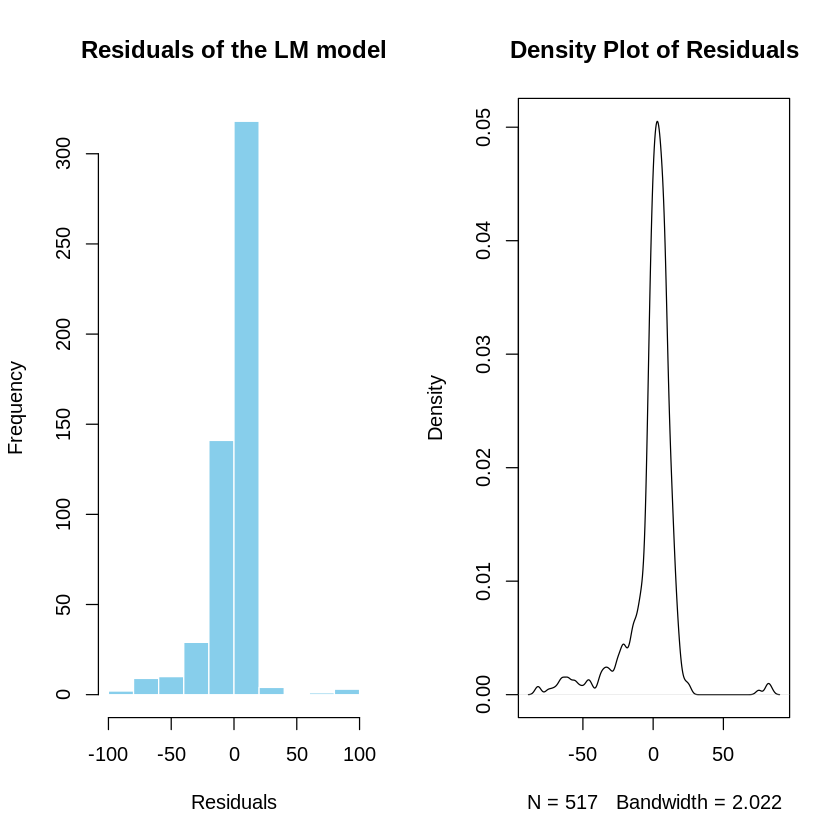

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_lm,
     main = "Residuals of the LM model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_lm), main = "Density Plot of Residuals")


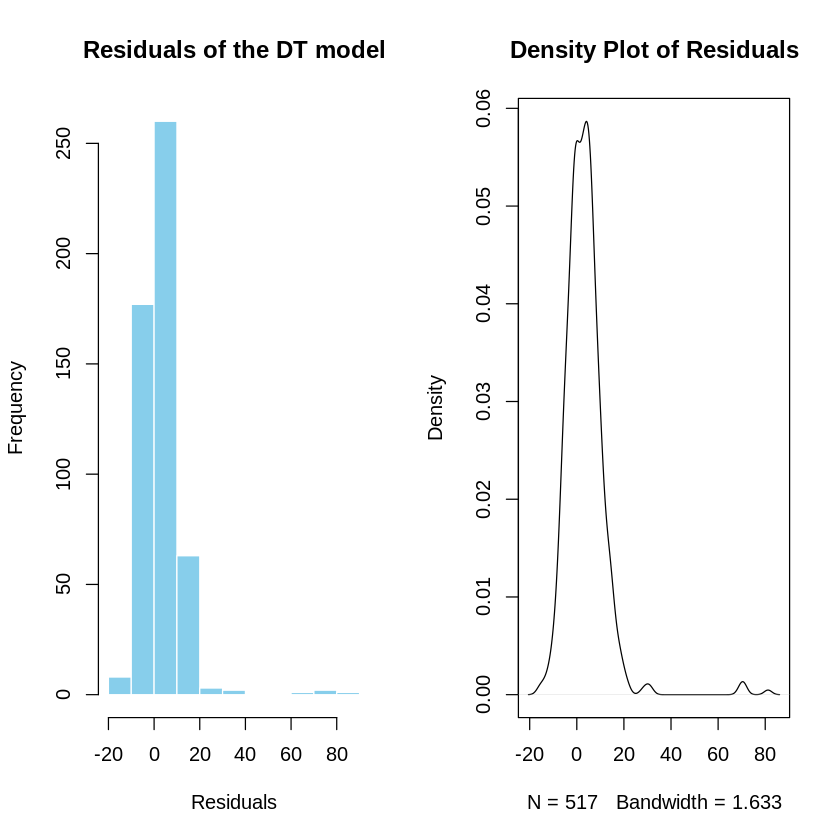

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_single,
     main = "Residuals of the DT model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_single), main = "Density Plot of Residuals")

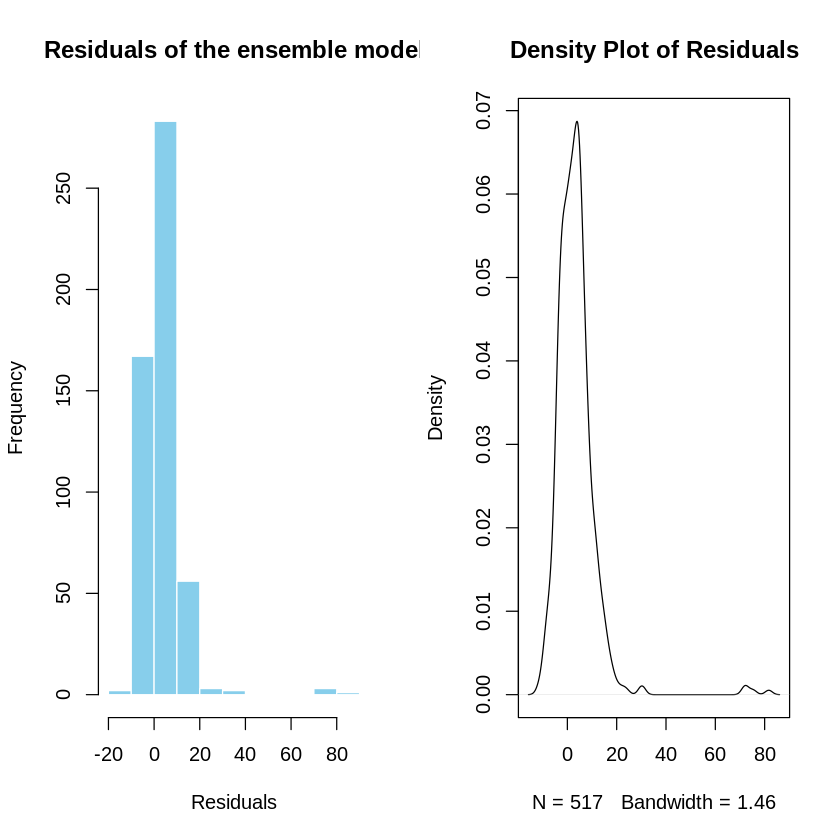

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_ensemble,
     main = "Residuals of the ensemble model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_ensemble), main = "Density Plot of Residuals")


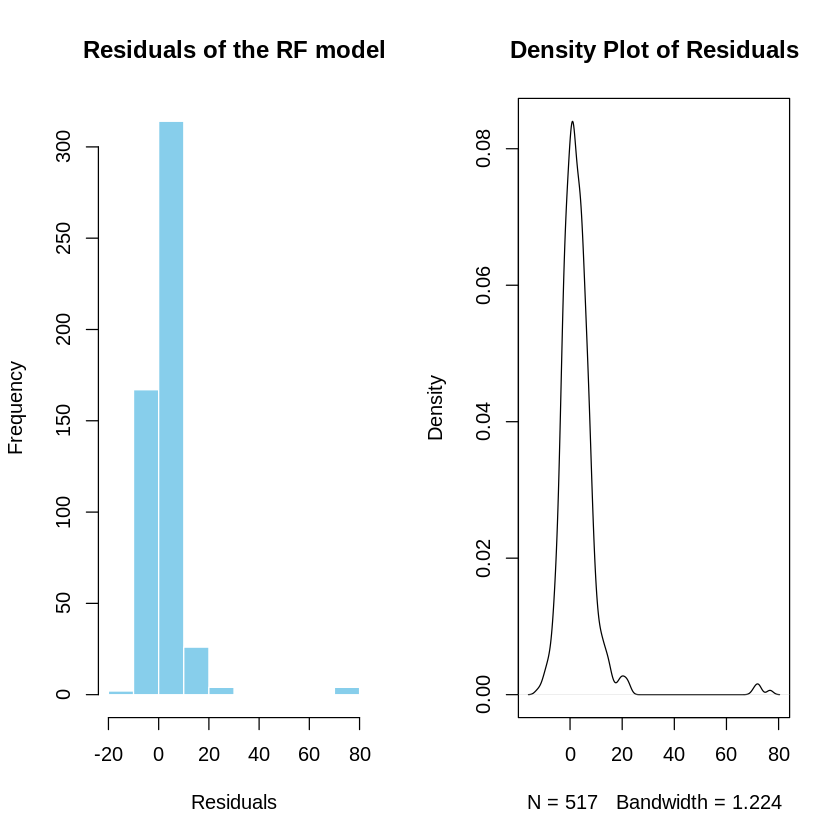

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_rf,
     main = "Residuals of the RF model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_rf), main = "Density Plot of Residuals")


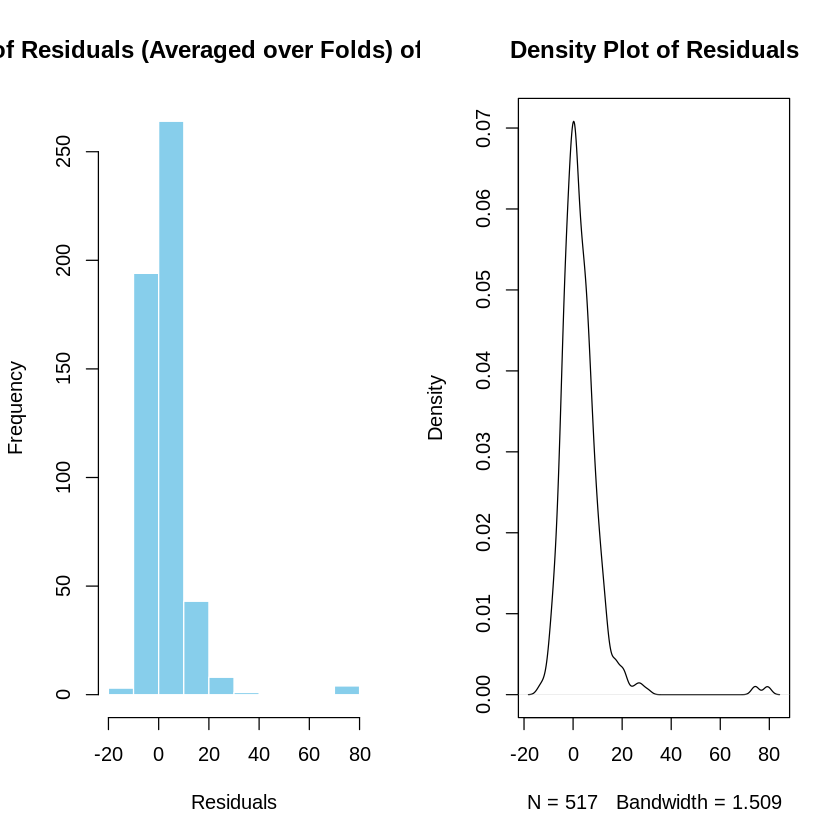

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_svm,
     main = "Histogram of Residuals (Averaged over Folds) of the SVM model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_svm), main = "Density Plot of Residuals")



	Shapiro-Wilk normality test

data:  average_residuals_xgboost
W = 0.60446, p-value < 2.2e-16


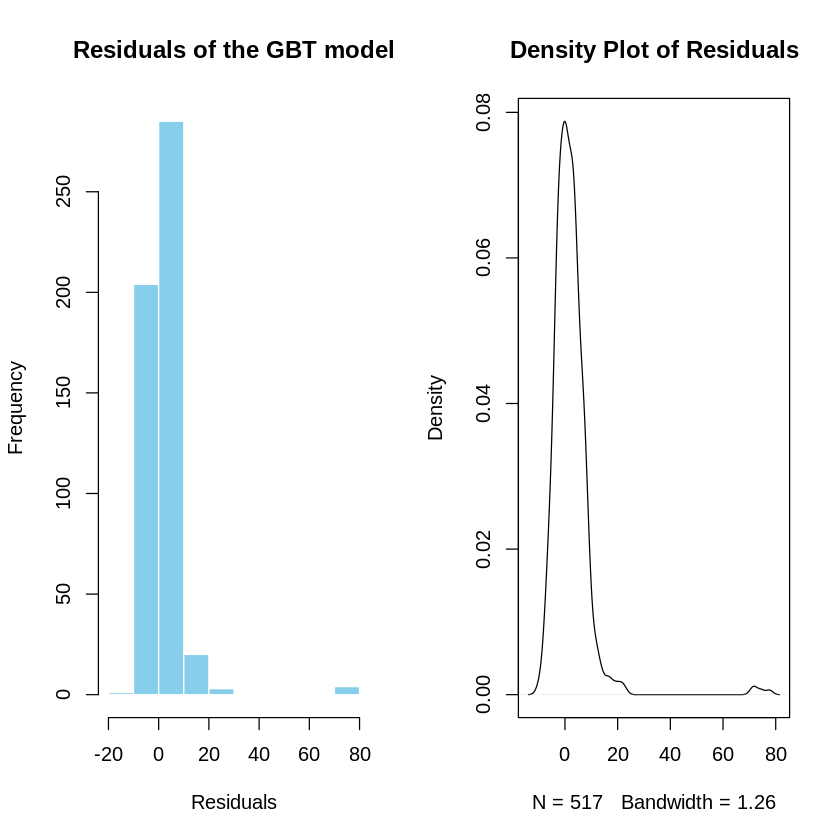

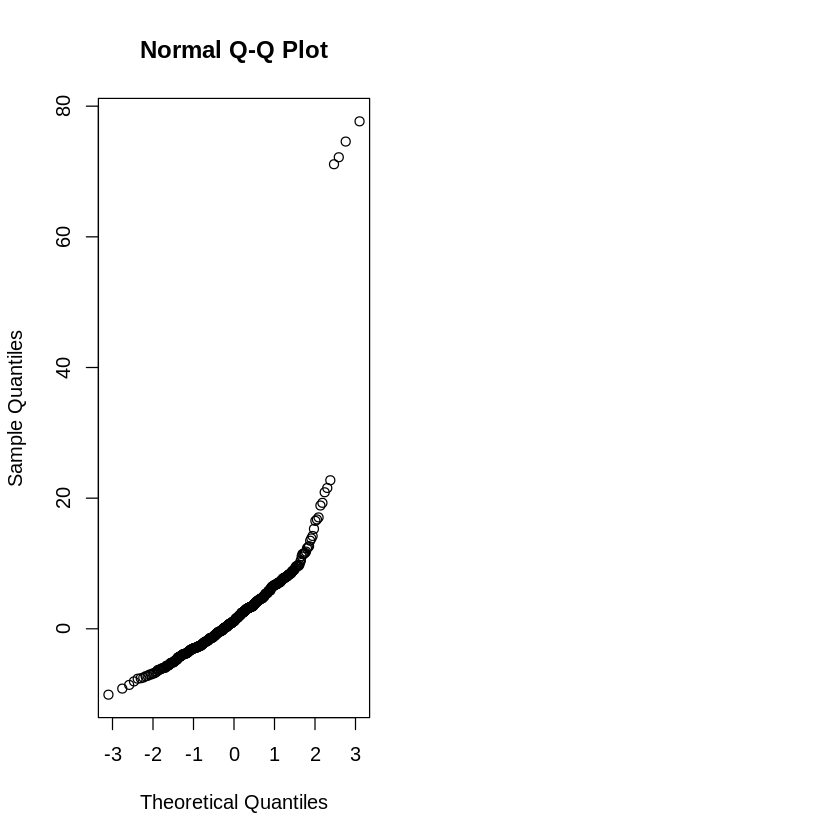

In [ ]:
# Set up the layout for two plots side by side
layout(matrix(c(1, 2), nrow = 1))

# Plot histogram of residuals
hist(average_residuals_xgboost,
     main = "Residuals of the GBT model",
     xlab = "Residuals",
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

# Plot density plot of residuals
plot(density(average_residuals_xgboost), main = "Density Plot of Residuals")
qqnorm(average_residuals_xgboost)
shapiro.test(average_residuals_xgboost)

#Statistical Comparison

In the context of model selection, we perform a statistical comparison to compare the performance of the multiple models considered. This aims to determine if the observed differences are statistically significant. To compare the different models, we use ANOVA (Analysis of Variance). It provides an overall F-statistic and associated p-value, indicating whether there are significant differences in performance among the models.




# Feature selection based on conditional entropy

In [48]:
# Function to calculate entropy
entropy <- function(y, y_hat) {
  probs <- table(y, y_hat) / length(y)
  entr = -sum(probs * log2(probs))
  return (entr)
}

In [50]:
# Initialize a vector to store the relevance scores
cond_information <- numeric(ncol(X_features_selected))

# Calculate cond_information for each feature
for (i in 1:ncol(X_features_selected)) {
  # Set aside the ith feature
  X_minus_i <- X_features_selected[, -i]

  # Train a gbt classifier
  xgboost_model <- lm(Y~., data = X_minus_i)

  # Predict the target variable using the modified feature set
  y_hat_minus_i <- predict(xgboost_model, newdata = X_minus_i)

  # Calculate the entropy of y given X_minus_i
  H_y_X_minus_i <- entropy(Y, y_hat_minus_i)

  # Calculate the entropy of y given X
  H_y_X <- entropy(Y, predict(xgboost_model))

  # Compute the cond_information of the ith feature
  cond_information[i] <- H_y_X_minus_i - H_y_X
}

# Sort the features based on cond_information in descending order
sorted_features <- names(X_features_selected)[order(cond_information, decreasing = TRUE)]

# Print the sorted feature rankings
cat("Feature conditional information Rankings:\n")
for (i in 1:length(sorted_features)) {
  cat(i, ": ", sorted_features[i], "\n")
}

Feature conditional information Rankings:
1 :  target_min 
2 :  target_max 
3 :  target_variance 
4 :  target_count 
5 :  precipitable_water_entire_atmosphere 
6 :  relative_humidity_2m_above_ground 
7 :  specific_humidity_2m_above_ground 
8 :  temperature_2m_above_ground 
9 :  u_component_of_wind_10m_above_ground 
10 :  v_component_of_wind_10m_above_ground 
11 :  L3_NO2_NO2_column_number_density 
12 :  L3_NO2_NO2_slant_column_number_density 
13 :  L3_NO2_absorbing_aerosol_index 
14 :  L3_NO2_cloud_fraction 
15 :  L3_NO2_sensor_altitude 
16 :  L3_NO2_sensor_azimuth_angle 
17 :  L3_NO2_sensor_zenith_angle 
18 :  L3_NO2_solar_azimuth_angle 
19 :  L3_NO2_solar_zenith_angle 
20 :  L3_NO2_stratospheric_NO2_column_number_density 
21 :  L3_NO2_tropopause_pressure 
22 :  L3_NO2_tropospheric_NO2_column_number_density 
23 :  L3_O3_O3_column_number_density 
24 :  L3_O3_O3_effective_temperature 
25 :  L3_O3_cloud_fraction 
26 :  L3_O3_sensor_azimuth_angle 
27 :  L3_O3_sensor_zenith_angle 
28 :  L3